<h1>Load yours data</h1>

In [2]:
# -- Import --
import pandas as pd
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from math import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import ccxt
sys.path.append( '../../utilities' )
from data_engine import DataEngine

# -- You can change the crypto pair ,the start date and the time interval below --
pair = 'LUNA/USDT'
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.binance(), path_to_data='../database/')

df = dataEngine.get_historical_from_db(pair, timeframe, startDate)

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Successfully load 13360 candles for LUNAUSDT
Data loaded 100%


<h1>Define your indicators</h1>

In [3]:
# -- Indicator variable --
trixLength = 8
trixSignal = 18
stochWindow = 14

# -- Drop all columns we do not need --
df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

# -- Indicators, you can edit every value --
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'], trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=14, smooth1=3, smooth2=3)


print("Indicators loaded 100%")
df

Indicators loaded 100%


,open,high,low,close,volume,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,STOCH_RSI
timestamp,,,,,,,,,,
2020-08-21 10:00:00,0.5397,0.5397,0.4010,0.4584,1000167.44,NaN,NaN,NaN,NaN,NaN
2020-08-21 11:00:00,0.4588,0.4605,0.4500,0.4500,109805.56,NaN,NaN,NaN,NaN,NaN
2020-08-21 12:00:00,0.4494,0.4527,0.4258,0.4520,234247.81,NaN,NaN,NaN,NaN,NaN
2020-08-21 13:00:00,0.4519,0.4527,0.4459,0.4483,157480.31,NaN,NaN,NaN,NaN,NaN
2020-08-21 14:00:00,0.4485,0.4487,0.4300,0.4387,219494.92,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-03-01 15:00:00,88.6200,89.1500,86.1100,86.9900,662685.66,88.740328,0.342493,0.756968,-0.414474,0.000000
2022-03-01 16:00:00,86.9900,88.7700,86.3800,87.9800,428402.09,88.952657,0.239270,0.710671,-0.471401,0.099873
2022-03-01 17:00:00,87.9600,89.6900,87.4600,89.0900,245512.19,89.097086,0.162367,0.656605,-0.494238,0.208339


<h1>Overbought optimizer</h1>

Loading... 42 / 42


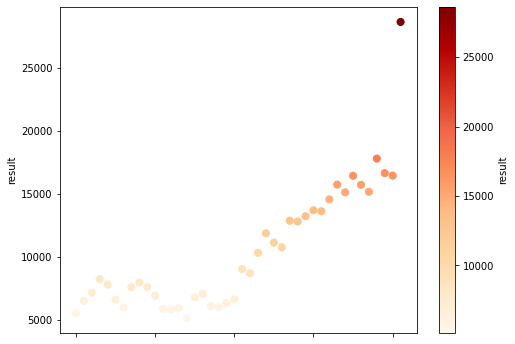

    param1        result
14    74.0   5112.108937
0     60.0   5508.823365
12    72.0   5839.327766
11    71.0   5872.297026
13    73.0   5943.197378
6     66.0   5985.748512
18    78.0   6020.507392
17    77.0   6094.388904
19    79.0   6341.873786
1     61.0   6506.611192
5     65.0   6598.310321
20    80.0   6626.054199
15    75.0   6784.445693
10    70.0   6922.510328
16    76.0   7066.602206
2     62.0   7154.777139
9     69.0   7605.153882
7     67.0   7608.475870
4     64.0   7800.711775
8     68.0   7963.630713
3     63.0   8232.991903
22    82.0   8698.525523
21    81.0   9035.494712
23    83.0  10319.040291
26    86.0  10761.345051
25    85.0  11127.413812
24    84.0  11868.486927
28    88.0  12799.441889
27    87.0  12863.176093
29    89.0  13214.918133
31    91.0  13612.105769
30    90.0  13689.839297
32    92.0  14558.127070
34    94.0  15112.909790
37    97.0  15158.522983
36    96.0  15708.766943
33    93.0  15722.906621
35    95.0  16426.594517
40   100.0  16441.325064


In [3]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [60, 102, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
  count += 1
  clear_output(wait=True)
  print("Loading...",count,'/',maxCount)
  # -- You can change variables below --
  usdt = 1000
  coin = 0

  stochTop = i / 100

  previousRow = dfTest.iloc[0]

  for index, row in dfTest.iterrows():
    #BUY
    if buyCondition(row, stochTop) and usdt > 0:
      coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
      usdt = 0

    #SELL
    elif sellCondition(row) and coin > 0:
      usdt = coin * row['close'] - (0.0007 * coin * row['close'])
      coin = 0

  myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
  dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))

<h2>Trix Parameters Optimizer</h2>

Loading... 260 / 260


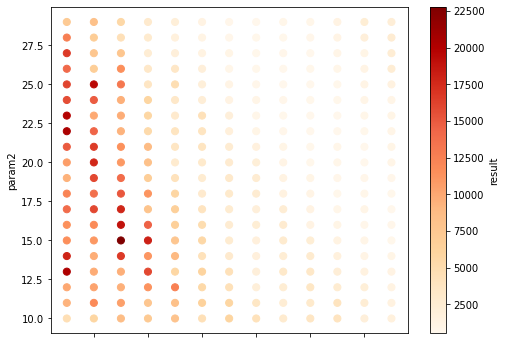

     param1  param2        result
176    13.0    26.0    532.884096
159    12.0    29.0    548.020764
213    15.0    23.0    550.055364
230    16.0    20.0    582.656515
175    13.0    25.0    583.209015
..      ...     ...           ...
35      6.0    25.0  19368.806686
13      5.0    23.0  19841.542478
3       5.0    13.0  20156.219605
12      5.0    22.0  20343.941420
45      7.0    15.0  22750.373141

[260 rows x 3 columns]


In [4]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [5, 18, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [10, 30, 1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    count += 1
    clear_output(wait=True)
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    trixLength = i
    trixSignal = j
    # -- Indicators, you can edit every value --
    dfTest['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=dfTest['close'], window=trixLength), window=trixLength), window=trixLength)
    dfTest['TRIX_PCT'] = dfTest["TRIX"].pct_change()*100
    dfTest['TRIX_SIGNAL'] = ta.trend.sma_indicator(dfTest['TRIX_PCT'], trixSignal)
    dfTest['TRIX_HISTO'] = dfTest['TRIX_PCT'] - dfTest['TRIX_SIGNAL']

    stochTop = 0.85

    previousRow = dfTest.iloc[0]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': i, 'param2': j,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>Stock RSI Optimizer</h1>

Loading... 29 / 29


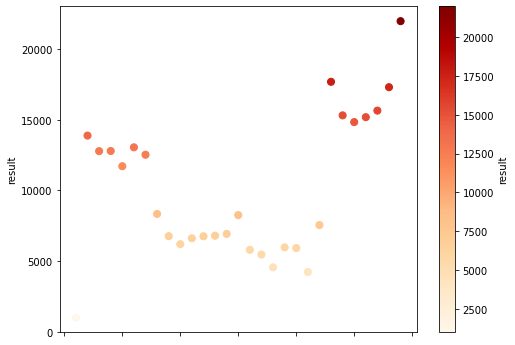

    param1        result
0      1.0   1000.000000
20    21.0   4224.877096
17    18.0   4557.363897
16    17.0   5462.282429
15    16.0   5796.639785
19    20.0   5920.555431
18    19.0   5969.950068
9     10.0   6195.129458
10    11.0   6612.630035
11    12.0   6750.289556
8      9.0   6761.742317
12    13.0   6794.855244
13    14.0   6922.510328
21    22.0   7547.365922
14    15.0   8248.577684
7      8.0   8334.327277
4      5.0  11707.895329
6      7.0  12520.258884
2      3.0  12773.387247
3      4.0  12783.323220
5      6.0  13042.175275
1      2.0  13873.967510
24    25.0  14828.333938
25    26.0  15176.163735
23    24.0  15303.229158
26    27.0  15638.441952
27    28.0  17294.728105
22    23.0  17675.814796
28    29.0  21964.341162


In [6]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [1, 30, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
    count += 1
    clear_output(wait=True)
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=i, smooth1=3, smooth2=3)

    stochTop = 0.70

    previousRow = dfTest.iloc[0]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))